## Лабораторная работа №3
### Хрусталева Мария Олеговна
### 17-АС
#### Вариант 21



### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso

from scipy.stats import pearsonr, spearmanr


In [2]:
df = pd.read_csv('auto-mpg.data.txt', sep='\s+', names=["mpg",
                                                        "cylinders",
                                                        "displacement",
                                                        "horsepower",
                                                        "weight",
                                                        "acceleration",
                                                        "model_year",
                                                        "origin",
                                                        "car_name"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


|Признак|Описание|Тип| 
|:--------------|:--------------|:-------------------|
|mpg|потребление топлива|вещественный|
|cylinders|число цилиндров|дискретный|
|displacement|литраж|вещественный|
|horsepower|мощность|вещественный|
|weight|вес|вещественный|
|acceleration|ускорение|вещественный|
|model year|год выпуска|дискретный|
|origin|место производства|дискретный|
|car name|название модели|строка(уникальная)|

In [3]:
df.drop('car_name', axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [5]:
df.horsepower = df.horsepower.apply(lambda x: float(x) if x!='?' else None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
df.horsepower = df.horsepower.transform(lambda x: x.fillna(x.mean()))

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;


In [8]:
df.shape

(398, 8)

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(398, 8)

### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlotдля признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);


Разделим признаки на категориальные и количественные

In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
dtype: int64

cylinders, origin - категориальные признаки

In [11]:
df.cylinders = df.cylinders.apply(lambda x: str(x))
df.origin = df.origin.apply(lambda x: str(x))

numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']

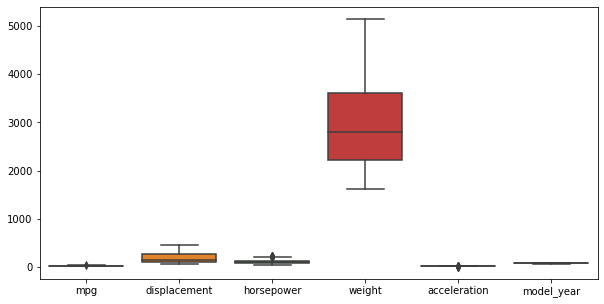

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numerical_columns])
plt.show()

In [13]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,0.0,1
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,0.0,1
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,0.0,1
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,0.0,1
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,0.0,1


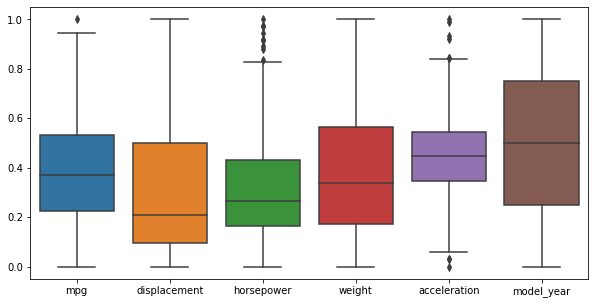

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numerical_columns])
plt.show()

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;


In [15]:
print("cylinders unique values - {}".format(df.cylinders.unique()))
print("origin unique values - {}".format(df.origin.unique()))

cylinders unique values - ['8' '4' '6' '3' '5']
origin unique values - ['1' '3' '2']


Уникальных значений мало, поэтмому можно применить dummy-кодирование

In [16]:
onehot_encoder = OneHotEncoder(sparse=False)
for column in categorical_columns:
    headers = [int(item) for item in df[column].unique()]
    headers.sort()
    df_categorical = pd.DataFrame(onehot_encoder.fit_transform(df[column].values.reshape(-1,1)),
                                columns=["{}_{}".format(column,i) for i in headers])
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([df_categorical, df] , axis=1)
df.head()

,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,mpg,displacement,horsepower,weight,acceleration,model_year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.239362,0.617571,0.456522,0.536150,0.238095,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.159574,0.728682,0.646739,0.589736,0.208333,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.239362,0.645995,0.565217,0.516870,0.178571,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.186170,0.609819,0.565217,0.516019,0.238095,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.212766,0.604651,0.510870,0.520556,0.148810,0.0


### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;


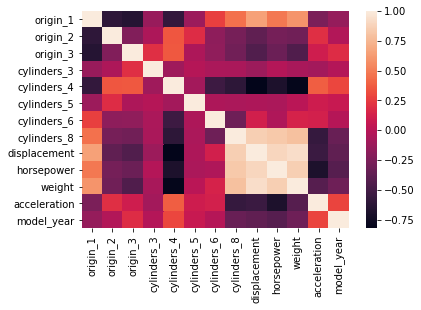

In [17]:
df_corr = df.drop('mpg', axis=1).corr()
sns.heatmap(df_corr)
plt.show()

In [18]:
df.drop('displacement', axis=1, inplace=True)

### 6.	Заполните пропущенные значения в данных;


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin_1      398 non-null    float64
 1   origin_2      398 non-null    float64
 2   origin_3      398 non-null    float64
 3   cylinders_3   398 non-null    float64
 4   cylinders_4   398 non-null    float64
 5   cylinders_5   398 non-null    float64
 6   cylinders_6   398 non-null    float64
 7   cylinders_8   398 non-null    float64
 8   mpg           398 non-null    float64
 9   horsepower    398 non-null    float64
 10  weight        398 non-null    float64
 11  acceleration  398 non-null    float64
 12  model_year    398 non-null    float64
dtypes: float64(13)
memory usage: 40.5 KB


### 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйтеперекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value.


In [20]:
X, y = df.drop(['mpg'], axis=1), df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

линейная регрессия без использования регуляризаторов

In [21]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg_pred = reg.predict(X_test)

In [22]:
print(reg_pred[:10] - y_test[:10])

150    0.046606
42    -0.107894
120    0.126422
102    0.094839
293    0.040494
264    0.126173
54    -0.133231
299    0.018185
309   -0.223920
91    -0.018813
Name: mpg, dtype: float64


In [23]:
corr = {}
corr['pearson'], pvalue_pearson = pearsonr(reg_pred, y_test)
corr['spearman'], pvalue_spearman = spearmanr(reg_pred, y_test)
print('Pearson’s correlation coefficient: ', corr['pearson'], '\np-value: ', pvalue_pearson)
print('Spearman’s correlation coefficient: ', corr['spearman'], '\np-value: ', pvalue_spearman)

Pearson’s correlation coefficient:  0.8901318441305818 
p-value:  4.3566552810552364e-42
Spearman’s correlation coefficient:  0.9132593864021699 
p-value:  7.64806900976159e-48


линейная регрессия, LASSO регуляризатор

In [24]:
reg = Lasso(alpha=0.001)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

In [25]:
print(reg_pred[:10] - y_test[:10])

150    0.049987
42    -0.077185
120    0.153579
102    0.069533
293    0.034636
264    0.094372
54    -0.162443
299    0.018909
309   -0.225173
91    -0.009413
Name: mpg, dtype: float64


In [26]:
corr['pearson'], pvalue_pearson = pearsonr(reg_pred, y_test)
corr['spearman'], pvalue_spearman = spearmanr(reg_pred, y_test)
print('Pearson’s correlation coefficient: ', corr['pearson'], '\np-value: ', pvalue_pearson)
print('Spearman’s correlation coefficient: ', corr['spearman'], '\np-value: ', pvalue_spearman)

Pearson’s correlation coefficient:  0.8821325538779482 
p-value:  2.163316216817127e-40
Spearman’s correlation coefficient:  0.9053928108538641 
p-value:  1.0140529543233519e-45
